In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Loading the Dataset FER2013

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


extracted the zip file

In [3]:
zip_path = '/content/drive/MyDrive/MoodMirror/dataset.zip'


In [4]:
import os

extract_path = '/content/dataset'
os.makedirs(extract_path, exist_ok=True)


In [5]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [6]:
os.listdir(extract_path)


['train', 'test']

In [7]:
train_dir = os.path.join(extract_path, 'train')
test_dir  = os.path.join(extract_path, 'test')


“ImageDataGenerator is used to load FER-2013 images, normalize pixel values, and apply real-time data augmentation to improve CNN generalization while ensuring fair testing.”(Preprocessing)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
train_generator = train_generator
test_generator = test_generator


In [55]:
import json
import os

# Path to save labels
label_save_path = '/content/drive/MyDrive/MoodMirror/class_labels.json'

# Get class indices from training generator
class_labels = train_generator.class_indices

# Save as JSON
with open(label_save_path, 'w') as f:
    json.dump(class_labels, f, indent=4)

print("✅ class_labels.json created successfully")
print(class_labels)


✅ class_labels.json created successfully
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


**Exploratory Data Analysis**

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


In [ ]:
emotion_labels = sorted(os.listdir(train_dir))

print("Emotion Classes:", emotion_labels)

Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


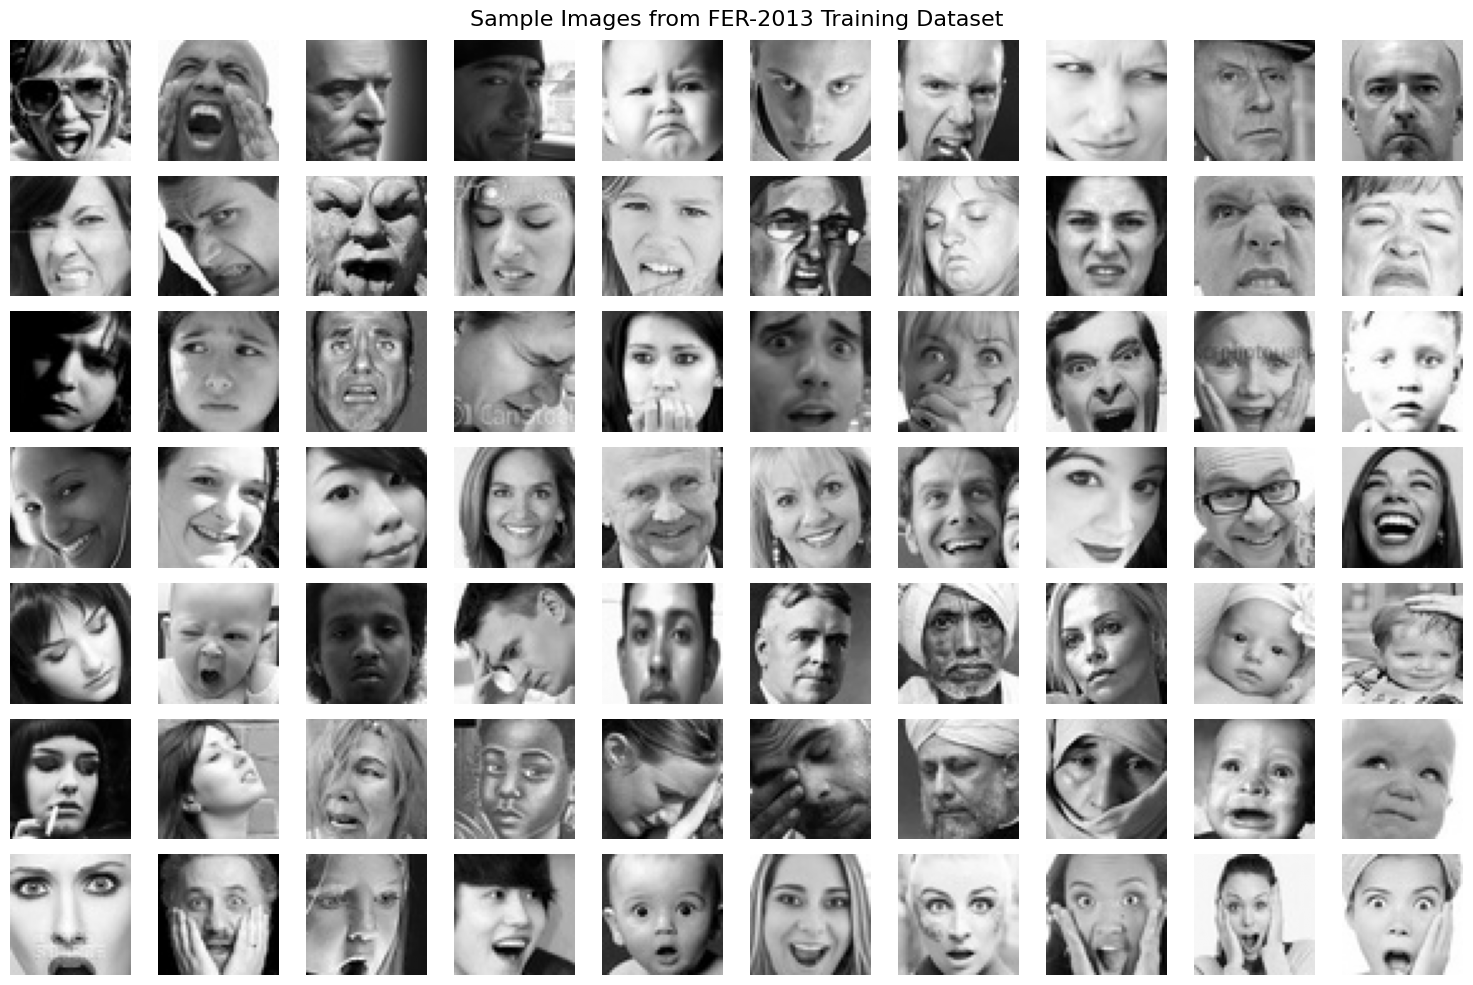

In [ ]:
plt.figure(figsize=(15, 10))

img_count = 0

for emotion in emotion_labels:
    emotion_path = os.path.join(train_dir, emotion)
    images = os.listdir(emotion_path)[:10]   # first 10 images

    for img_name in images:
        img_path = os.path.join(emotion_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        plt.subplot(len(emotion_labels), 10, img_count + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        if img_count % 10 == 0:
            plt.ylabel(emotion, fontsize=12)

        img_count += 1

plt.suptitle("Sample Images from FER-2013 Training Dataset", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
class_counts = {}

for emotion in emotion_labels:
    emotion_path = os.path.join(train_dir, emotion)
    class_counts[emotion] = len(os.listdir(emotion_path))

print('Class Count for Train Dataset are as follow:')
class_counts



Class Count for Train Dataset are as follow:


{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}

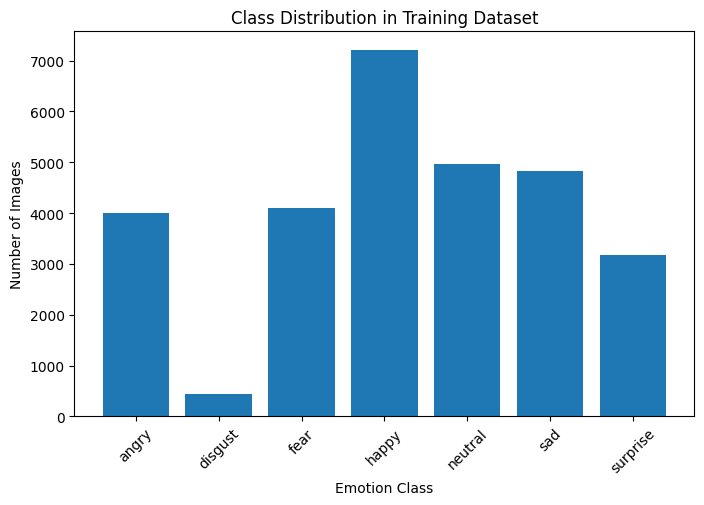

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Emotion Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Dataset")
plt.xticks(rotation=45)
plt.show()


In [ ]:
class_counts = {}

for emotion in emotion_labels:
    emotion_path = os.path.join(test_dir, emotion)
    class_counts[emotion] = len(os.listdir(emotion_path))

print('Class Count for Test Dataset are as follow:')
class_counts

Class Count for Test Dataset are as follow:


{'angry': 958,
 'disgust': 111,
 'fear': 1024,
 'happy': 1774,
 'neutral': 1233,
 'sad': 1247,
 'surprise': 831}

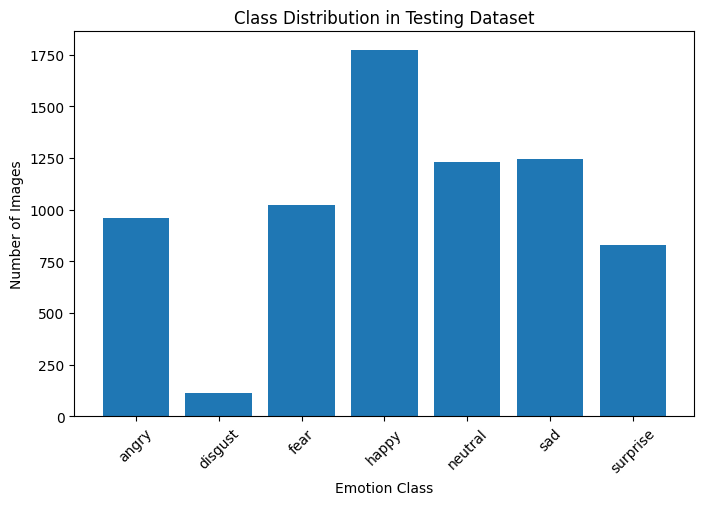

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Emotion Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Testing Dataset")
plt.xticks(rotation=45)
plt.show()

In [ ]:
sample_emotion = emotion_labels[0]
sample_img = os.listdir(os.path.join(train_dir, sample_emotion))[0]

img = cv2.imread(os.path.join(train_dir, sample_emotion, sample_img), cv2.IMREAD_GRAYSCALE)
print("Image shape:", img.shape)


Image shape: (48, 48)


In [ ]:
sample_emotion = emotion_labels[0]
sample_img = os.listdir(os.path.join(test_dir, sample_emotion))[0]

img = cv2.imread(os.path.join(test_dir, sample_emotion, sample_img), cv2.IMREAD_GRAYSCALE)
print("Image shape:", img.shape)

Image shape: (48, 48)


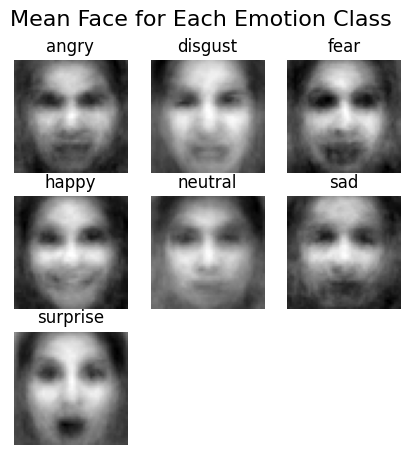

In [ ]:
import numpy as np
import cv2

plt.figure(figsize=(5,5))

for i, emotion in enumerate(emotion_labels):
    emotion_path = os.path.join(train_dir, emotion)
    images = os.listdir(emotion_path)[:200]  # sample subset

    mean_img = np.zeros((48,48), dtype=np.float32)

    for img_name in images:
        img = cv2.imread(os.path.join(emotion_path, img_name), cv2.IMREAD_GRAYSCALE)
        mean_img += img

    mean_img /= len(images)

    plt.subplot(3,3,i+1)
    plt.imshow(mean_img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.suptitle("Mean Face for Each Emotion Class", fontsize=16)
plt.show()


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
"""
Modeling


model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Dense(units = 64,activation = 'relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(units = 32,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation = 'softmax'))

"""

"\nModeling\n\n\nmodel = Sequential()\nmodel.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu',input_shape=(img_size,img_size,1)))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))\nmodel.add(MaxPool2D(pool_size = 2,strides = 2))\nmodel.add(BatchNormalization())\n\nmodel.add(Flatten())\nmodel.add(Dense(units = 128,activation = 'relu',kernel_initializer='he_normal'))\nmodel.add(Dropout(0.25))\nmodel.add(Dense(units = 64,activation = 'relu'

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
epochs = 60
batch_size = 64

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = test_generator)

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.1700 - loss: 9.5240 - val_accuracy: 0.1977 - val_loss: 8.5347
Epoch 2/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2063 - loss: 8.1734 - val_accuracy: 0.2526 - val_loss: 6.9586
Epoch 3/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.2106 - loss: 6.8679 - val_accuracy: 0.2612 - val_loss: 5.7022
Epoch 4/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.2228 - loss: 5.6107 - val_accuracy: 0.2675 - val_loss: 4.5951
Epoch 5/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2308 - loss: 4.5440 - val_accuracy: 0.2758 - val_loss: 3.7549
Epoch 6/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2427 - loss: 3.7186 - val_accuracy: 0.3135 - val_loss: 3.0591
Epoch 7/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.2468 - loss: 3.1143 - val_accuracy: 0.2817 - val_loss: 2.7536
Epoch 8/60
449/449 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.2667 - loss: 2.7169 - val_accurac

In [ ]:
import os

save_dir = '/content/drive/MyDrive/MoodMirror'
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, '59%_fer2013.keras')
model.save(model_path)



In [ ]:
os.listdir(save_dir)


['checkpoint_best.h5', 'final_model.h5', 'dataset.zip', '59%_fer2013.keras']

Training another Model

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [20]:
row = 48
col = 48
fernet = get_model((row,col,1), classes=7) # Assuming 7 classes based on previous training
fernet.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 22, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │    31,720,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,116,743 (122.52 MB)

 Trainable params: 32,116,103 (122.51 MB)

 Non-trainable params: 640 (2.50 KB)

In [43]:
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

chk_path = 'ferNet.keras'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             monitor='val_loss')

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [26]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=60,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4751 - loss: 1.7410
Epoch 1: val_loss improved from inf to 1.54637, saving model to ferNet.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 69ms/step - accuracy: 0.4751 - loss: 1.7410 - val_accuracy: 0.5236 - val_loss: 1.5464 - learning_rate: 1.0000e-04
Epoch 2/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5469 - loss: 1.4668
Epoch 2: val_loss did not improve from 1.54637
448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5469 - loss: 1.4668 - val_accuracy: 0.5184 - val_loss: 1.5518 - learning_rate: 1.0000e-04
Epoch 3/60
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4943 - loss: 1.6039
Epoch 3: val_loss improved from 1.54637 to 1.43574, saving model to ferNet.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.4943 - loss: 1.6039 - val_accuracy: 0.5505 - val_loss: 1.4357 - learning_rate: 1.0000e-04
Epoch 4/60
  1/448 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5781 - loss: 1.3954
Epoch

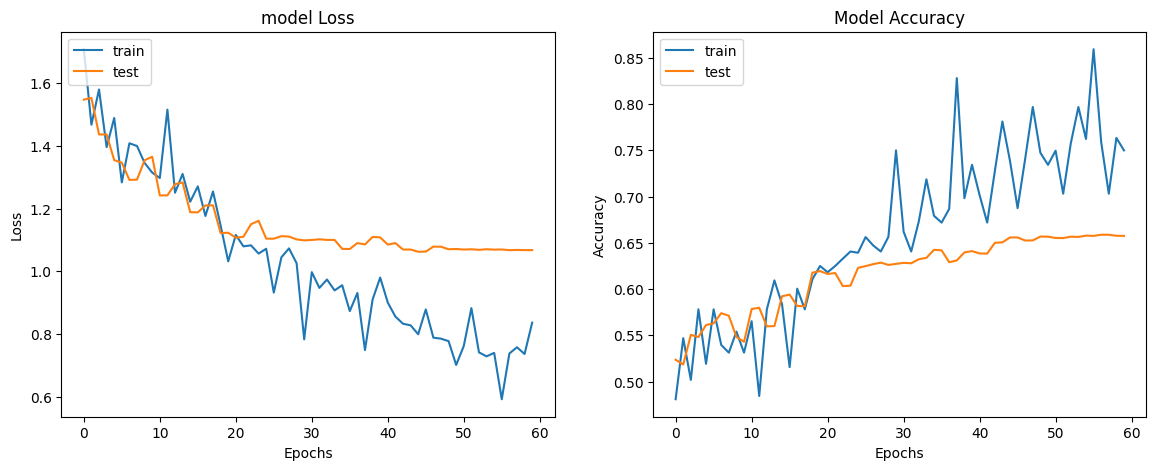

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

449/449 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.8334 - loss: 0.5798
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6587 - loss: 1.0668
final train accuracy = 83.21 , validation accuracy = 65.76


In [36]:
fernet.save_weights('fernet.weights.h5')

Confusion Matrix and Classification on training set

449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step
Confusion Matrix
[[ 519   51  495 1013  755  716  446]
 [  53    2   54  117   92   69   49]
 [ 548   60  500 1066  742  696  485]
 [ 936   83  945 1896 1381 1202  772]
 [ 665   56  631 1306  902  842  563]
 [ 691   62  588 1261  905  816  507]
 [ 462   34  376  801  581  560  357]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.13      0.13      3995
     disgust       0.01      0.00      0.01       436
        fear       0.14      0.12      0.13      4097
       happy       0.25      0.26      0.26      7215
     neutral       0.17      0.18      0.17      4965
         sad       0.17      0.17      0.17      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



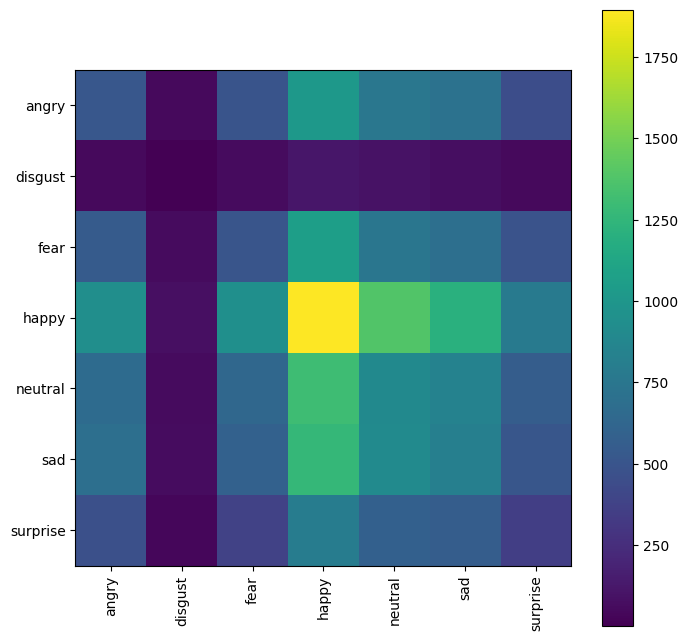

In [38]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix and Classification on test set

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
Confusion Matrix
[[157   5  98 231 191 175 101]
 [ 18   2  18  20  24  19  10]
 [160  14 104 238 200 173 135]
 [242  13 205 438 376 303 197]
 [174  12 134 310 257 208 138]
 [162   9 130 341 250 209 146]
 [135   8  90 191 155 150 102]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.16      0.16       958
     disgust       0.03      0.02      0.02       111
        fear       0.13      0.10      0.12      1024
       happy       0.25      0.25      0.25      1774
     neutral       0.18      0.21      0.19      1233
         sad       0.17      0.17      0.17      1247
    surprise       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.17      0.18      0.18      7178



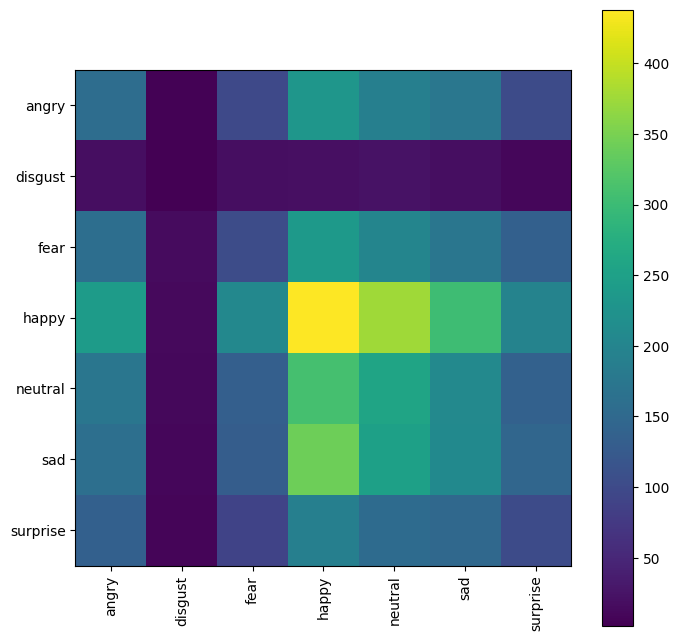

In [39]:
y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [48]:
import os

save_dir = '/content/drive/MyDrive/MoodMirror'
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, 'ferNet.keras')
fernet.save(model_path)

In [49]:
os.listdir(save_dir)

['dataset.zip',
 'checkpoint_best.h5',
 'final_model.h5',
 '59%_fer2013.keras',
 '83%_ferNet.keras',
 'ferNet.keras']

Testing Predictions of train model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


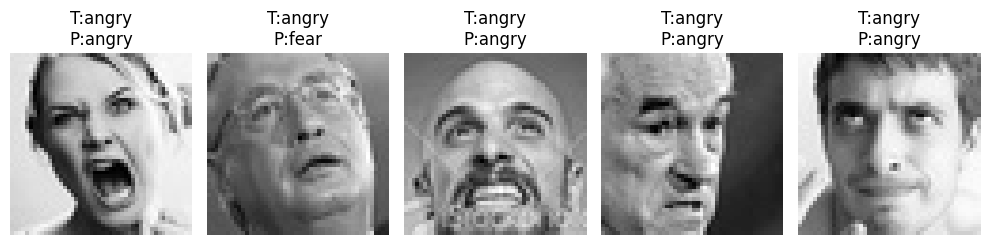

In [52]:
import os
import random

emotion = 'angry'  # change emotion here
emotion_path = os.path.join(test_dir, emotion)

sample_images = random.sample(os.listdir(emotion_path), 5)

plt.figure(figsize=(10,4))

# Define emotion_dict
emotion_dict = {v: k for k, v in training_set.class_indices.items()}

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(emotion_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img_norm = img / 255.0
    img_input = img_norm.reshape(1,48,48,1)

    pred = fernet.predict(img_input)
    pred_emotion = emotion_dict[np.argmax(pred)]

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{emotion}\nP:{pred_emotion}")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


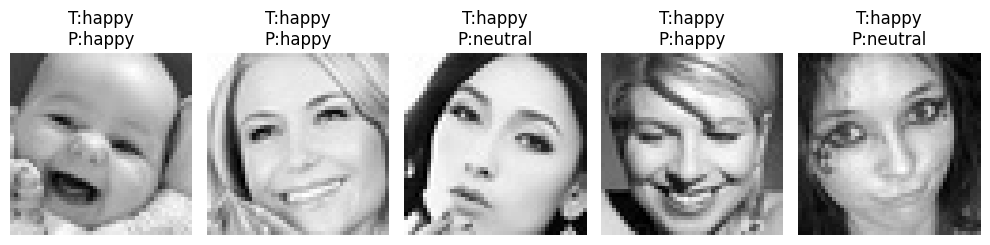

In [53]:
import os
import random

emotion = 'happy'  # change emotion here
emotion_path = os.path.join(test_dir, emotion)

sample_images = random.sample(os.listdir(emotion_path), 5)

plt.figure(figsize=(10,4))

# Define emotion_dict
emotion_dict = {v: k for k, v in training_set.class_indices.items()}

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(emotion_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img_norm = img / 255.0
    img_input = img_norm.reshape(1,48,48,1)

    pred = fernet.predict(img_input)
    pred_emotion = emotion_dict[np.argmax(pred)]

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{emotion}\nP:{pred_emotion}")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


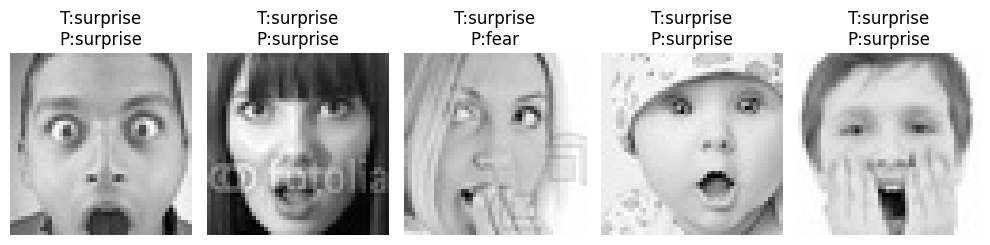

In [54]:
import os
import random

emotion = 'surprise'  # change emotion here
emotion_path = os.path.join(test_dir, emotion)

sample_images = random.sample(os.listdir(emotion_path), 5)

plt.figure(figsize=(10,4))

# Define emotion_dict
emotion_dict = {v: k for k, v in training_set.class_indices.items()}

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(emotion_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48,48))
    img_norm = img / 255.0
    img_input = img_norm.reshape(1,48,48,1)

    pred = fernet.predict(img_input)
    pred_emotion = emotion_dict[np.argmax(pred)]

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{emotion}\nP:{pred_emotion}")
    plt.axis('off')

plt.tight_layout()
plt.show()